In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

In [5]:
decimation = pd.read_csv("Decimation_long_term.csv")
inversion = pd.read_csv("PTI_Inversion.csv")

In [6]:
def detector(phase, outputphase, min_intensity, max_intensity):
    scaled = np.cos(phase - outputphase)
    return (max_intensity - min_intensity) / 2 * scaled + (max_intensity + min_intensity) / 2

# DC Signals

## Detector 1

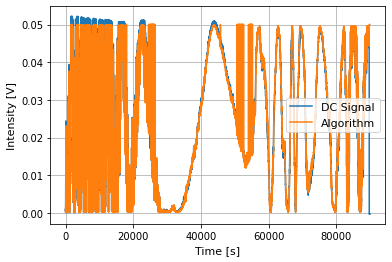

In [31]:
plt.plot(range(len(decimation)), decimation["DC CH1"], label="DC Signal")
plt.plot(range(len(decimation)), detector(inversion["Interferometric Phase"], 0, min_intensity=0.0002, max_intensity=0.05), label="Algorithm")
plt.legend(fontsize=11)
plt.grid()
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Intensity [V]", fontsize=11)
plt.show()

In [28]:
dc_measured = decimation["DC CH1"][:20000]
dc_algorithm =  detector(inversion["Interferometric Phase"], 0, min_intensity=0, max_intensity=0.052)

In [29]:
def best_fit(measured, phase):
    return lambda x: np.sum((measured - ((x[0] - x[1]) / 2 * np.cos(phase) + (x[0] + x[1]) / 2)) ** 2)

In [30]:
res = optimize.minimize(best_fit(measured=dc_measured, phase=inversion["Interferometric Phase"]), x0=[0.052, 0])
res

      fun: 0.011190845568842565
 hess_inv: array([[ 7.64129531e-05, -2.36046412e-05],
       [-2.36046412e-05,  7.09497267e-05]])
      jac: array([4.59793955e-06, 3.61194834e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 158
      nit: 2
     njev: 49
   status: 2
  success: False
        x: array([0.05141165, 0.00023825])

In [9]:
dc_measured = decimation["DC CH2"]

def best_fit(measured, phase):
    return lambda x: np.sum((measured - ((x[0] - x[1]) / 2 * np.cos(phase - x[2]) + (x[0] + x[1]) / 2)) ** 2)


res = optimize.minimize(best_fit(measured=dc_measured, phase=inversion["Interferometric Phase"]), x0=[3.16, 0.15, 2.15])
res

      fun: 298.48646178523074
 hess_inv: array([[ 3.12653062e-04, -1.11396611e-04,  5.01595392e-05],
       [-1.11396611e-04,  4.89839304e-04,  4.25212877e-05],
       [ 5.01595392e-05,  4.25212877e-05,  1.35321301e-03]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 68
      nit: 13
     njev: 17
   status: 0
  success: True
        x: array([1.31849719, 0.37808804, 1.86997646])

In [5]:
dc_measured = decimation["DC CH3"]

def best_fit(measured, phase):
    return lambda x: np.sum((measured - ((x[0] - x[1]) / 2 * np.cos(phase - x[2]) + (x[0] + x[1]) / 2)) ** 2)


res = optimize.minimize(best_fit(measured=dc_measured, phase=inversion["Interferometric Phase"]), x0=[3.751, 0.053, 3.73])
res

      fun: 4.044564415024414
 hess_inv: array([[ 3.57288058e-04, -1.12470386e-04,  1.02206858e-05],
       [-1.12470386e-04,  3.23542306e-04,  2.81837143e-05],
       [ 1.02206858e-05,  2.81837143e-05,  9.74638760e-05]])
      jac: array([ 1.19209290e-07,  1.19209290e-07, -3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 8
     njev: 12
   status: 0
  success: True
        x: array([3.11465473, 0.09756253, 3.75085711])

In [45]:
plt.plot(range(len(decimation)), decimation["DC CH1"], label="DC Signal")
plt.plot(range(len(decimation)), detector(inversion["Interferometric Phase"], 0, min_intensity=0.053, max_intensity=3.751), label="Algorithm")
plt.plot(range(len(decimation)), detector(inversion["Interferometric Phase"], 0, min_intensity=0.08348542, max_intensity=3.63861031), label="Algorithm Corrected")
#plt.plot(range(len(decimation)), detector(inversion_without_error_function["Interferometric Phase"], 0, min_intensity=0.053, max_intensity=3.751),
#         label="First Guess")
plt.legend(fontsize=11)
plt.grid()
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Intensity [V]", fontsize=11)
plt.show()

## Detector 2

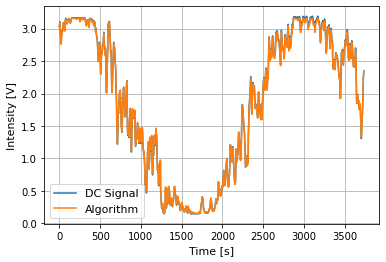

In [16]:
plt.plot(range(len(decimation)), decimation["DC CH2"], label="DC Signal")
plt.plot(range(len(decimation)), detector(inversion["Interferometric Phase"], 2.15, min_intensity=0.15, max_intensity=3.16), label="Algorithm")
#plt.plot(range(len(decimation)), detector(inversion_without_error_function["Interferometric Phase"], 1.84, min_intensity=0.013, max_intensity=1.466), label="First Guess")
plt.legend(fontsize=11)
plt.grid()
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Intensity [V]", fontsize=11)
plt.show()

## Detector 3

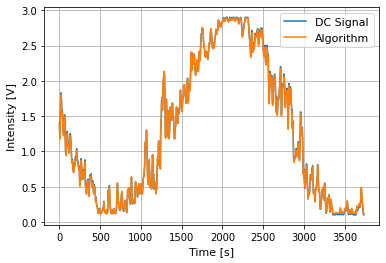

In [18]:
plt.plot(range(len(decimation)), decimation["DC CH3"], label="DC Signal")
plt.plot(range(len(decimation)), detector(inversion["Interferometric Phase"], 4.25, min_intensity=0.12, max_intensity=2.89), label="Algorithm")
#plt.plot(range(len(decimation)), detector(inversion_without_error_function["Interferometric Phase"], 3.73, min_intensity=0.07, max_intensity=3.21),
#         label="First Guess")
plt.legend(fontsize=11)
plt.grid()
plt.xlabel("Time [s]", fontsize=11)
plt.ylabel("Intensity [V]", fontsize=11)
plt.show()